In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


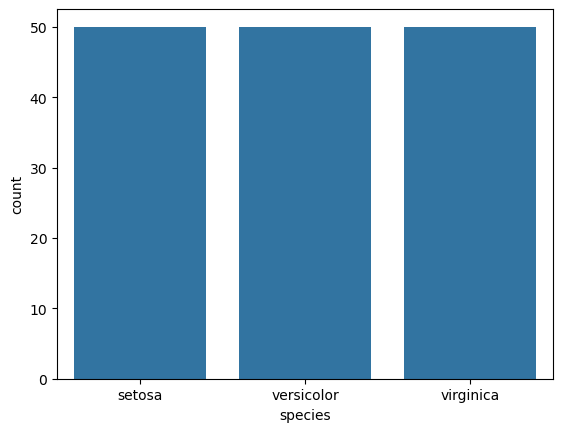

In [3]:
sns.countplot(data=iris_df,x='species')
plt.show()

In [4]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

X = iris_df.drop('species', axis=1)
y = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [6]:
y_pred = knn_model.predict(scaled_X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [7]:
report = classification_report(y_test,y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(report)
print(confusion_matrix)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


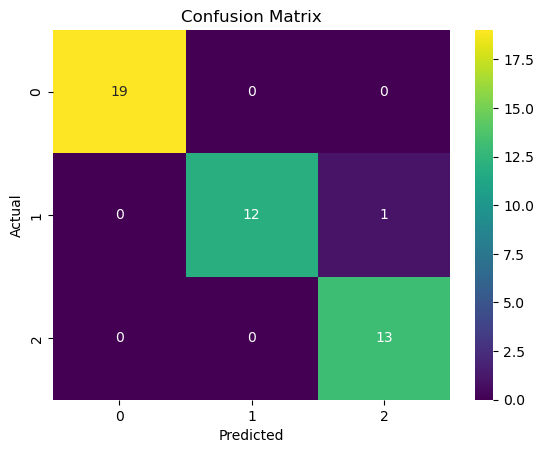

In [8]:
cmap = plt.cm.viridis

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap=cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

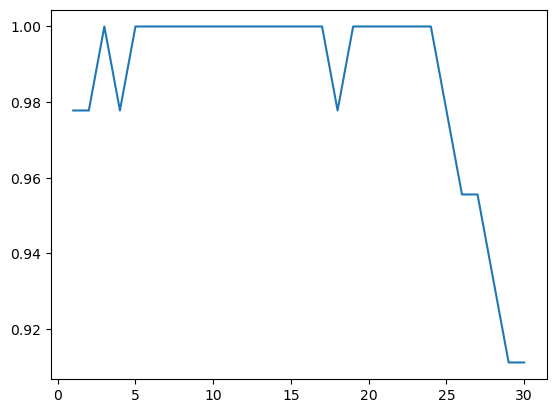

[0.9777777777777777, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111]


In [9]:
k_accuracy = []
for k in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred = knn_model.predict(scaled_X_test)
    acurracy = accuracy_score(y_test,y_pred)
    k_accuracy.append(acurracy)
x = np.linspace(1,30,30)
plt.plot(x,k_accuracy)
plt.show()
print(k_accuracy)

In [10]:
optimal_k = 3
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn_model.predict(scaled_X_test)

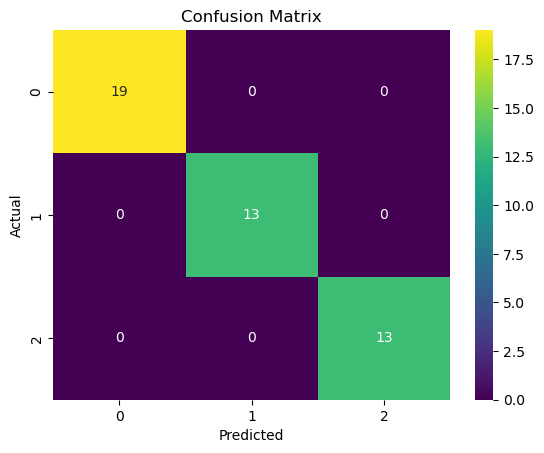

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
report = classification_report(y_test,y_pred)

score = accuracy_score(y_test,y_pred)

matrix = confusion_matrix(y_test,y_pred)
cmap = plt.cm.viridis

sns.heatmap(matrix, annot=True, fmt="d", cmap=cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
cv_scores = []
from sklearn.model_selection import cross_val_score
for k in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model,X,y,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

[0.96,
 0.9466666666666665,
 0.9666666666666668,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9800000000000001,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9800000000000001,
 0.9800000000000001,
 0.9733333333333334,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666666,
 0.9666666666666668,
 0.96,
 0.9666666666666668,
 0.96,
 0.96,
 0.9466666666666667,
 0.96,
 0.9466666666666665,
 0.9466666666666667,
 0.9399999999999998,
 0.9333333333333332,
 0.9399999999999998]

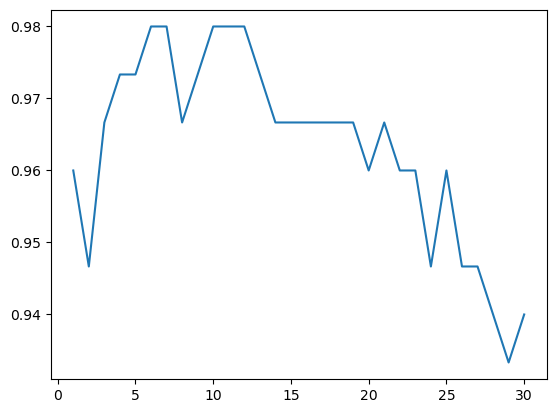

In [14]:
x = np.linspace(1,30,30)
plt.plot(x,cv_scores)
plt.show()

In [15]:
optimal_k = 5
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



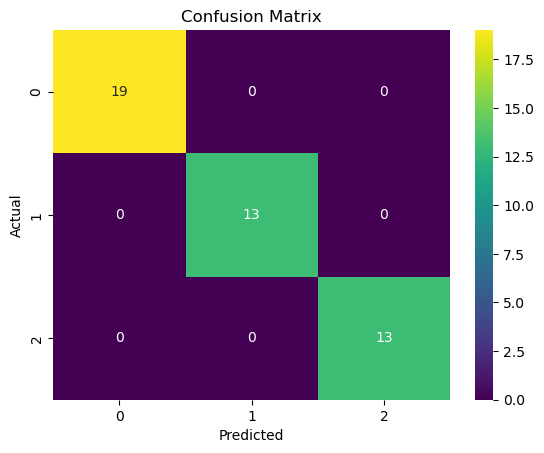

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
report = classification_report(y_test,y_pred)
print(report)
matrix = confusion_matrix(y_test,y_pred)
cmap = plt.cm.viridis

sns.heatmap(matrix, annot=True, fmt="d", cmap=cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()